In [129]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.simplefilter('ignore')
#plt.style.use('dark_background')


In [15]:
data = pd.read_csv('Housing_data.csv')
data.head()
data.shape

(21609, 31)

In [16]:
data['mean_sales'] = data['Sale_Price'].mean()
data['mean_sales'].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sales, dtype: float64

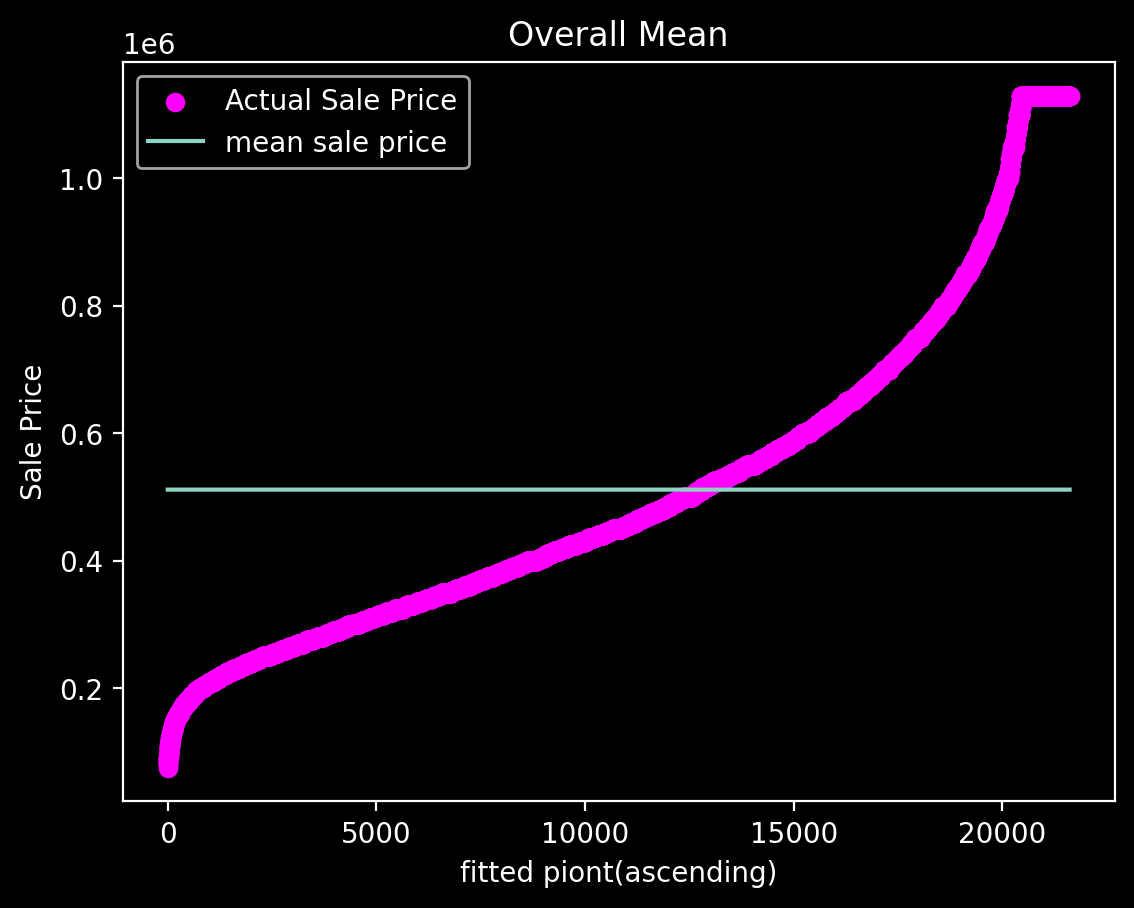

In [17]:
plt.figure(dpi = 200)
k = range(0,len(data))
plt.scatter(k,data['Sale_Price'].sort_values(),color = 'magenta',label = 'Actual Sale Price')
plt.plot(k, data['mean_sales'].sort_values(),label = 'mean sale price')
 
plt.xlabel('fitted piont(ascending)')
plt.ylabel('Sale Price')
plt.title('Overall Mean')
plt.legend()


In [20]:
grades_mean = data.pivot_table(values =  'Sale_Price', columns = 'Overall Grade', aggfunc = np.mean)
grades_mean

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


<Axes: >

In [21]:
data['grade_mean'] = 0
for i in grades_mean.columns:
    data['grade_mean'][data['Overall Grade'] == i] = grades_mean[i][0]
    
data['grade_mean'].head()

0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grade_mean, dtype: float64

In [18]:
gradewise_list = []
for i in range(1,11):
  k = data["Sale_Price"][data["Overall Grade"] == i]
  gradewise_list.append(k)
    
len(gradewise_list[6])

8979

In [108]:
 l = [[ 0 for _ in range(10)]for _ in range(10)]
l

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [109]:
k = range(0,10)
k 

range(0, 10)

In [114]:
mean_difference = data['mean_sales']-data['Sale_Price']
grade_mean_difference = data['grade_mean']-data['Sale_Price']

<function matplotlib.pyplot.legend(*args, **kwargs)>

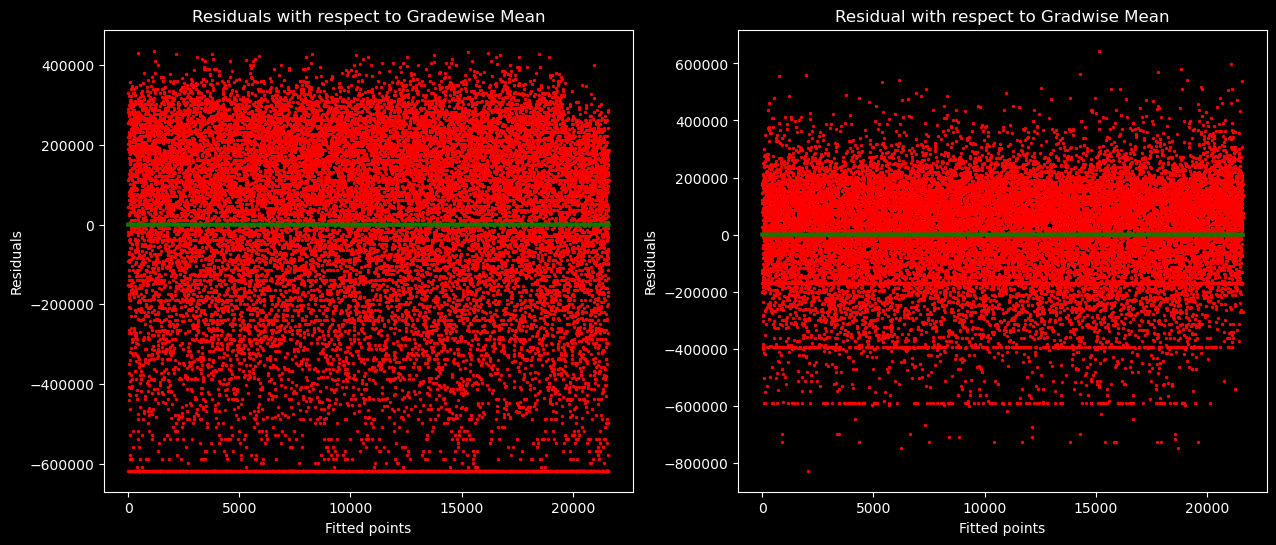

In [121]:
k = range(0,len(data))
l = [0 for i in range(len(data))]

plt.figure(figsize = (15,6), dpi = 100)
plt.subplot(1,2,1)
plt.scatter(k ,mean_difference, color = 'red', label = 'Residuals',s = 2)
plt.plot( k ,l,color = 'green', label = 'mean Rgrgession', linewidth = 3)
plt.xlabel('Fitted points')
plt.ylabel('Residuals')
plt.title('Residuals with respect to Gradewise Mean')

plt.subplot(1,2,2)
plt.scatter(k,grade_mean_difference, color = 'red', label = 'Residals',s = 2)
plt.plot( k ,l,color = 'green', label = 'mean Rgrgession', linewidth = 3)
plt.ylabel('Residuals')
plt.xlabel('Fitted points')
plt.title('Residual with respect to Gradwise Mean')
plt.legend

In [120]:
y = sin(2**2)


NameError: name 'sin' is not defined

In [12]:
y = data['Sale_Price']
y_hat1 = data['mean_sales']
y_hat2 = data['grade_mean']
n = len(data)


NameError: name 'data' is not defined

In [124]:
cost_mean = sum(abs(y_hat1-y))/n
cost_mean

199168.78146839526

In [125]:
cost_grade_mean = sum(abs(y_hat2-y))/n
cost_grade_mean

137081.70298203363

In [130]:
from sklearn.metrics import mean_absolute_error
cost_grade_mean = mean_absolute_error(y_hat2,y)
cost_grade_mean

137081.7029820291

In [131]:
from sklearn.metrics import mean_squared_error
cost_mean = mean_squared_error(y_hat1,y)
cost_grade_mean = mean_squared_error(y_hat2,y)
cost_mean,cost_grade_mean

(62528116847.799576, 30804835720.342426)

In [132]:
  from sklearn.metrics import mean_squared_error
cost_mean = mean_squared_error(y_hat1,y)**0.5
cost_grade_mean = mean_squared_error(y_hat2,y)**0.5
cost_mean,cost_grade_mean

(250056.2273725643, 175513.06424406826)

In [11]:
y = data['Sale_Price']
y_bar = data['mean_sales']
y_hat = data['grade_mean']
n = len(data)

NameError: name 'data' is not defined

In [152]:
mse_mean = mean_squared_error(y_bar,y)
mse_mean

62528116847.799576

In [151]:
 mse_model = mean_squared_error(y_hat,y)
mse_model

30804835720.342426

In [153]:
R2 = 1- mse_model/mse_mean

In [154]:
R2

0.5073442592981836

In [29]:
sale_price = data['Sale_Price'].head(30)
flat_area = data['Flat Area (in Sqft)'].head(30)
sampd= pd.DataFrame({'sale_price': sale_price,'flat_area':flat_area})

In [30]:
sampd

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


In [24]:
plt.figure(dpi = 150)
plt.scatter(sampd.flat_area,sampd.sale_price,color= 'blue')
plt.xlabel('Flat Area')
plt.ylabel('Sale Price')
plt.title('sale vs flat area')
plt.legend()
plt.show

NameError: name 'sampd' is not defined

<Figure size 960x720 with 0 Axes>

In [20]:
sampd['mean_sale_price']= sampd.sale_price.mean()

In [23]:

plt.figure(dpi = 500)
plt.scatter(sampd.flat_area,sampd.sale_price,color= 'blue')
plt.plot(sampd.flat_area,sampd.mean_sale_price,color= 'green',label = 'mean sale price')
plt.figure(dpi = 3000)
plt.xlabel('Flat Area')
plt.ylabel('Sale Price')
plt.title('sale vs flat area')
plt.legend()
plt.show


NameError: name 'sampd' is not defined

<Figure size 3200x2400 with 0 Axes>

# cost function
cost function behaviour with slope


In [65]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error


def slope_error(slope,intercept,sample_data):
    sale =[]
    for i in range(len(sampd.flat_area)):
        tmp = sampd.flat_area[i]*slope + intercept
        sale.append(tmp)
    MSE = mse(sampd.sale_price,sale)
    return MSE

slope = [i/10 for i in range(0,5000)]
costs=[]    # here cost is the mse 
for i in slope:
    cost = slope_error(slope=i,intercept= 10384,sample_data = sampd)
    costs.append(cost)

In [66]:
cost_table = pd.DataFrame({'cost':costs,'slope': slope})
cost_table 

,cost,slope
0,2.718020e+11,0.0
1,2.715897e+11,0.1
2,2.713775e+11,0.2
3,2.711654e+11,0.3
4,2.709534e+11,0.4
...,...,...
4995,3.632121e+11,499.5
4996,3.634611e+11,499.6
4997,3.637102e+11,499.7
4998,3.639593e+11,499.8


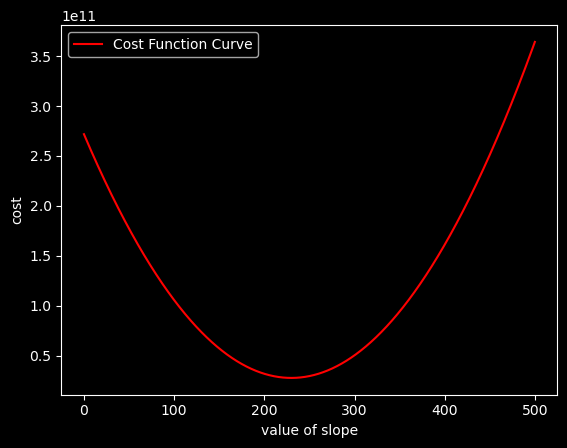

In [67]:
#plolting thea cost values corresponding to every vale fo beta
plt.plot(cost_table.slope,cost_table.cost,color ='red',label="Cost Function Curve")
plt.xlabel("value of slope")
plt.ylabel('cost')
plt.legend()

In [52]:
# clearly in above plot we can see cost w.r.t slope goes to certian lowest value  that is the optimum value   

# how cost depend on intercept


In [57]:
def intercept_error(slope,intercept,sample_data):
    sale = []
    for i in range(len(sampd.flat_area)):
        temp = sampd.flat_area[i]*slope + intercept
        sale.append(temp)
    MSE = mse(sampd.sale_price,sale)
    return MSE

intercept = [i for i in range(5000,50000)]
cost2 =[]
for i in intercept:
    cost = intercept_error(slope = 234,intercept = i,sample_data = sampd)
    cost2.append(cost)

In [62]:
intercept_table = pd.DataFrame({'cost2':cost2,'intercept':intercept})

In [63]:
intercept_table

,cost2,intercept
0,2.779911e+10,5000
1,2.779909e+10,5001
2,2.779908e+10,5002
3,2.779907e+10,5003
4,2.779906e+10,5004
...,...,...
44995,2.929862e+10,49995
44996,2.929870e+10,49996
44997,2.929878e+10,49997
44998,2.929886e+10,49998


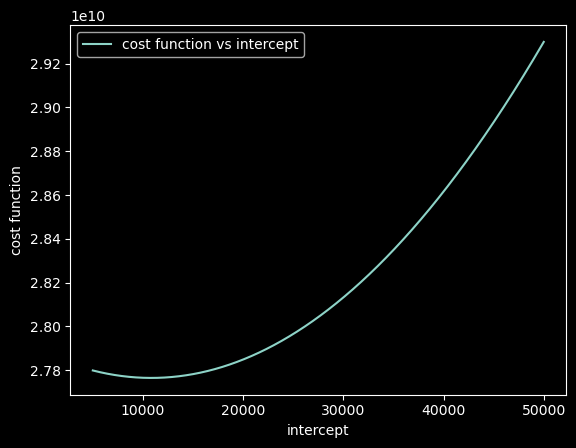

In [64]:
plt.plot(intercept_table.intercept,intercept_table.cost2,label = 'cost function vs intercept')
plt.xlabel('intercept')
plt.ylabel('cost function')
plt.legend()

In [68]:
# ALL ABOVE THE METHOD TO FIND COST VALUES ARE FOR ONE INDEPENDANT VARIABLE

#  GRADIANT DESCENT

In [69]:
def param_init(Y):
    '''
    Y = target variable 
    returns initialized values of m and c
    '''
    m = 0.1
    c = Y.mean()
    return m,c

In [73]:
def  generate_prediction(m,c,X):
    ''' X = independant variable 
    returns predictions generated by line with parameters m,c
    '''
    prediction = []
    for x in X:
        pred = (m*x)+c
        prediction.append(pred)
    return prediction
    

In [74]:
def compute_cost(prediction,Y):
    '''
    returns themean squared_error between prediction and Y
    '''
    cost = np.sum(((prediction -Y)**2)/len(Y))
    return cost

In [103]:
def gradients(prediction,Y,X):
    '''
    Returns Gradients corresponding to m and c 
    '''
    n = len(Y)
    Gm = 2/n * np.sum((prediction - Y)*X)
    Gc = 2/n * np.sum((prediction - Y))
    return Gm,Gc 

In [84]:
def param_update(m_old,c_old,Gm_old,Gc_old,alpha):
    '''
    Update and retrun the new values of m and c 
    '''
    
    m_new = m_old-alpha*Gm_old
    c_new = c_old-alpha*Gc_old
    return m_new,c_new

In [121]:
def result(m,c,X,Y,cost,prediction,i):
    #If the gradient descent converged to the optimum value before max_iter 
    
  if i < max_iter-1:
        print("****gradient descent has conver ged at iteration {}****".format(i))
  else:
            print("*** result after ",max_iter,'iteration is :****')
            
            
            ##plot final result 
           
  plt.figure(figsize = (14,7),dpi = 120)
  plt.scatter(X,Y,color='red',label = 'data points')
  label= 'final regression line :m={};c= {}'.format(str(m),str(c))
  plt.plot(X,prediction,color= 'green',label = label)
  plt.xlabel('flat_area')
  plt.ylabel('sale_price')
  plt.title('final regression line')
  plt.legend()
        
        

After Iteration  0 : m =  0.11316346413633305 ;c =  1.1849780416165836e-16 ;cost =  0.85836535863667
After Iteration  20 : m =  0.3275595607435688 ;c =  1.240489192847842e-16 ;cost =  0.6182472245590185
After Iteration  40 : m =  0.4706921039517346 ;c =  1.3248661427193537e-16 ;cost =  0.5112264752046607
After Iteration  60 : m =  0.5662485308150865 ;c =  1.415904430738617e-16 ;cost =  0.46352728398628984
After Iteration  80 : m =  0.6300427631414932 ;c =  1.4951003398285442e-16 ;cost =  0.4422677351921283
After Iteration  100 : m =  0.6726323011945988 ;c =  1.611303683072644e-16 ;cost =  0.4327923457067555
After Iteration  120 : m =  0.7010654163122192 ;c =  1.666074685620818e-16 ;cost =  0.42856916078553225
After Iteration  140 : m =  0.7200475906265729 ;c =  1.6660746856208182e-16 ;cost =  0.4266868855601835
After Iteration  160 : m =  0.7327202415200801 ;c =  1.669405354694694e-16 ;cost =  0.42584795473189874
After Iteration  180 : m =  0.7411806042798547 ;c =  1.6694053546946945e-

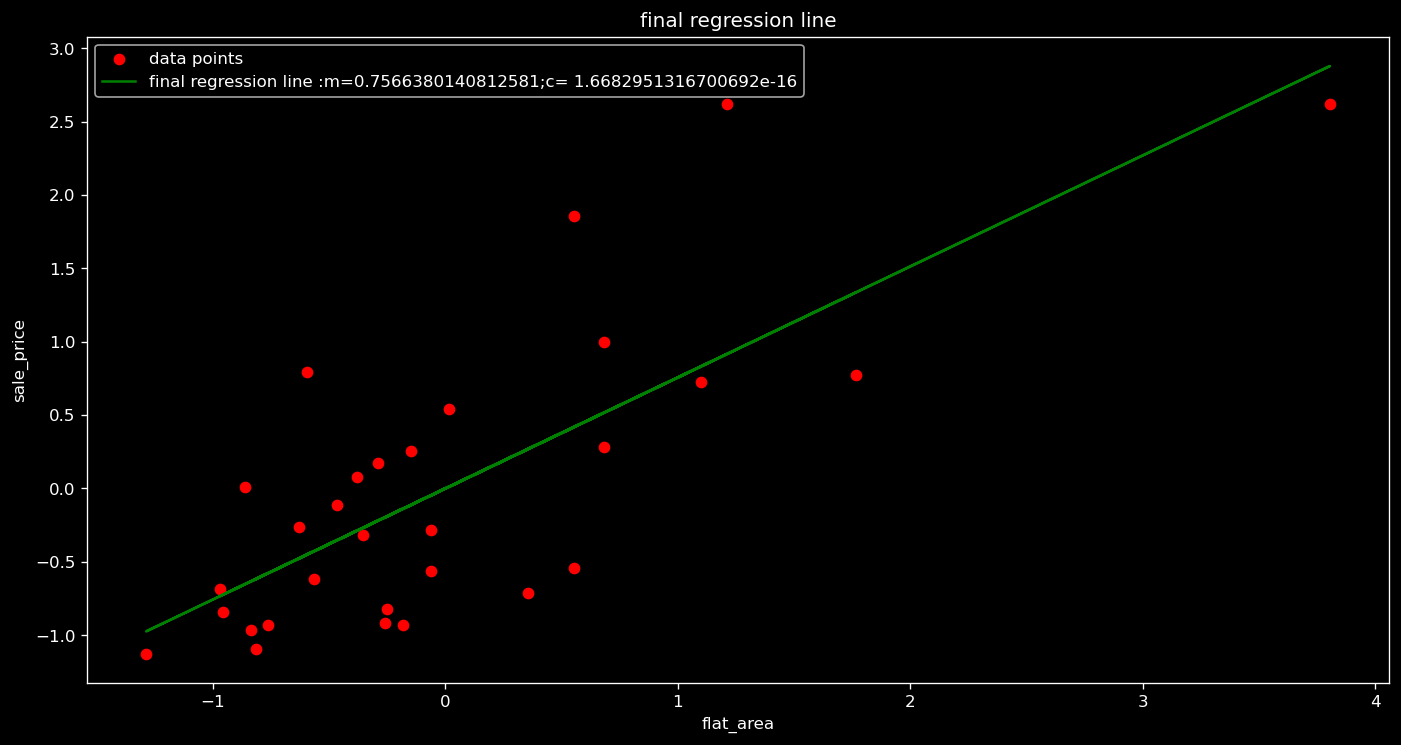

In [130]:
## scaling dataset using standard scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 


# defining and rehsapign the dataset 
sale_price = scaler.fit_transform(sampd['sale_price'].values.reshape(-1,1))
flat_area = scaler.fit_transform(sampd['flat_area'].values.reshape(-1,1))

# declaring parameters 
max_iter = 1000
cost_old = 0
alpha = 0.01


# step 1
m,c = param_init(sale_price)

for i in range(0,max_iter):
    # step 2
    predictions = generate_prediction(m,c,flat_area)
    # step 3
    cost_new = compute_cost(predictions , sale_price)
    ## checking if GD converged 
    if abs(cost_new - cost_old) <10**(-7):
      break
    ## calculating gradients
    Gm,Gc = gradients(predictions,sale_price,flat_area)
    
    ## step 4 updating parameter
    m,c = param_update(m,c,Gm,Gc,alpha)
    
    ##display result  after every 20 iteration 
    if i%20 ==0:
        print('After Iteration ',i ,': m = ',m,';c = ',c,';cost = ' ,cost_new)
    #updating cost_old
    cost_old = cost_new
# final result
result(m,c,flat_area,sale_price,cost_new,predictions,i)
    
    

# Implementing linear regression 

In [13]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.simplefilter('ignore')
#plt.style.use('dark_background')

In [14]:
  data = pd.read_csv('Housing_data.csv')

In [15]:
data.sample(5)

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
590,290000.0,3,2.50,1610.0,2937.0,2.0,0,8,1610.0,0,...,0,0,0,0,0,0,0,0,0,0
114,740500.0,3,3.50,4380.0,6350.0,2.0,0,8,2780.0,1600,...,0,0,0,1,0,0,0,0,0,0
4320,410000.0,4,2.25,2200.0,8292.0,2.0,0,7,2200.0,0,...,0,0,1,0,0,0,0,0,0,0
16632,225000.0,3,2.25,1590.0,9200.0,1.0,0,7,1110.0,480,...,0,1,0,0,0,0,0,0,0,0
13600,349950.0,5,3.00,2257.0,10117.0,1.0,0,8,1363.0,894,...,0,0,0,0,0,0,0,0,0,0


### scaling the data set

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['Sale_Price']
X = scaler.fit_transform(data.drop(columns = 'Sale_Price'))   # this gives us in numpy form
X = pd.DataFrame(data = X,columns = data.drop(columns = ['Sale_Price']).columns)
X.head()


,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


### checking correlation  & removing multicollineartiy

In [17]:
X.corr()  # this function give corr among all variable 

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
No of Bedrooms,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,...,-0.006578,-0.010603,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694
No of Bathrooms,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,...,0.063761,-0.032810,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871
Flat Area (in Sqft),0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,...,0.103841,-0.058817,-0.063005,-0.078761,0.086139,0.075978,0.160045,0.051211,0.169576,0.090253
Lot Area (in Sqft),0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,...,0.021605,0.023684,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671
No of Floors,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,...,0.023719,-0.003385,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868
No of Times Visited,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,...,0.401856,-0.065000,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923
Overall Grade,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,...,0.070332,-0.075495,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638
Area of the House from Basement (in Sqft),0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,...,0.072099,-0.028348,-0.052418,-0.090628,0.086640,0.062267,0.129310,0.029477,0.134021,0.087398
Basement Area (in Sqft),0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,...,0.080595,-0.069149,-0.032302,0.006247,0.016422,0.040662,0.090206,0.051128,0.101159,0.023775
Age of House (in Years),-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,0.053395,-0.456711,-0.423848,0.133072,1.000000,...,0.026149,-0.070111,0.022094,0.095882,-0.056974,-0.009965,0.025718,0.101486,-0.002705,-0.002492


In [18]:
''' the above is very tedious to find out  so write code to find it easyly'''

k = X.corr()
z = [[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j]>abs(0.5))&(i!=j)]
z , len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

In [19]:
# calutaing VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = X

VIF = pd.Series ([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns   )

In [150]:
VIF

No of Bedrooms                                  1.639470
No of Bathrooms                                 3.374992
Flat Area (in Sqft)                          1481.681648
Lot Area (in Sqft)                              2.108079
No of Floors                                    2.127787
No of Times Visited                             1.432385
Overall Grade                                   2.967448
Area of the House from Basement (in Sqft)    1205.549115
Basement Area (in Sqft)                       345.465009
Age of House (in Years)                         2.629539
Latitude                                        2.471442
Longitude                                       1.672691
Living Area after Renovation (in Sqft)          3.068139
Lot Area after Renovation (in Sqft)             2.144347
Years Since Renovation                          2.788098
Condition_of_the_House_Excellent               53.578111
Condition_of_the_House_Fair                   166.129930
Condition_of_the_House_Good    

In [22]:
VIF[VIF==VIF.max()].index[0]


'Flat Area (in Sqft)'

In [27]:
def mc_remover(data):
    vif = pd.Series([variance_inflation_factor(data.values,i) for i in range(data.shape[1])],index = data.columns)
    if vif.max() >5:
        print(vif[vif == vif.max()].index[0],'has been removed')
        data= data.drop(columns = [vif[vif == vif.max()].index[0]])
        return data
    else:
        print('no multicollinearity present anymore')
        return data 

In [28]:
for i in range(7):
    vif_data = mc_remover(vif_data)

vif_data.head(5)

Flat Area (in Sqft) has been removed
Condition_of_the_House_Fair has been removed
no multicollinearity present anymore
no multicollinearity present anymore
no multicollinearity present anymore
no multicollinearity present anymore
no multicollinearity present anymore


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [30]:

''' new updated vif_data set '''
VIF = pd.Series ([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF,len(vif_data.columns),vif_data

(No of Bedrooms                               1.638990
 No of Bathrooms                              3.373805
 Lot Area (in Sqft)                           2.107495
 No of Floors                                 2.127703
 No of Times Visited                          1.432363
 Overall Grade                                2.956967
 Area of the House from Basement (in Sqft)    4.580042
 Basement Area (in Sqft)                      1.974981
 Age of House (in Years)                      2.626504
 Latitude                                     2.471343
 Longitude                                    1.672667
 Living Area after Renovation (in Sqft)       3.063886
 Lot Area after Renovation (in Sqft)          2.144068
 Years Since Renovation                       2.788064
 Condition_of_the_House_Excellent             1.206487
 Condition_of_the_House_Good                  1.251488
 Condition_of_the_House_Okay                  1.025386
 Ever_Renovated_Yes                           2.955539
 Waterfron

### training and test data 


In [31]:
y = data['Sale_Price']
x = vif_data

In [33]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =train_test_split(x,y,test_size = 0.3,random_state = 101)

xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((15126, 28), (6483, 28), (15126,), (6483,))

In [47]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain,ytrain)
lr.score(xtrain,ytrain)  # this score function give R^2 value of the model we have created 

0.8412406591458191

In [44]:
(lr.coef_)     # y = m0+m1*x1 +m2*x2+m3*x3....   m1,m2,m3,m4,... are coefficient

array([ -3928.66247639,  12028.44560689,  14967.00497585,   2697.55278605,
        27220.31313417,  59965.44665815,  80697.80906997,  27729.56715434,
        27873.90231343,  21397.40341959, -23854.32640243,  17943.26729788,
        -2896.98542901, -10179.085198  ,  14239.3533334 ,   5095.97603572,
        -2296.64888137,  14594.33847962,  10761.77007875,  12165.83372082,
        33842.29544383,  63269.82875283,  81086.08553213,  50718.63947886,
        73274.09568028,  40153.03595158,  67405.70271285,  22113.74944051])

In [51]:
prediction = lr.predict(xtest)
lr.score(xtest,ytest)  ,lr.score(xtrain,ytrain) # give R^2

(0.8461987715586199, 0.8412406591458191)

### verifying assumptions 

In [65]:
## residuals
residuals= prediction - ytest
residual_table = pd.DataFrame({'residuals':residuals,'prediction':prediction})
residual_table = residual_table.sort_values(by = 'prediction')

In [61]:
z = [i for i in range(int(residual_table['prediction'].max()))]
k = [0 for i in range(int(residual_table['prediction'].max()))]


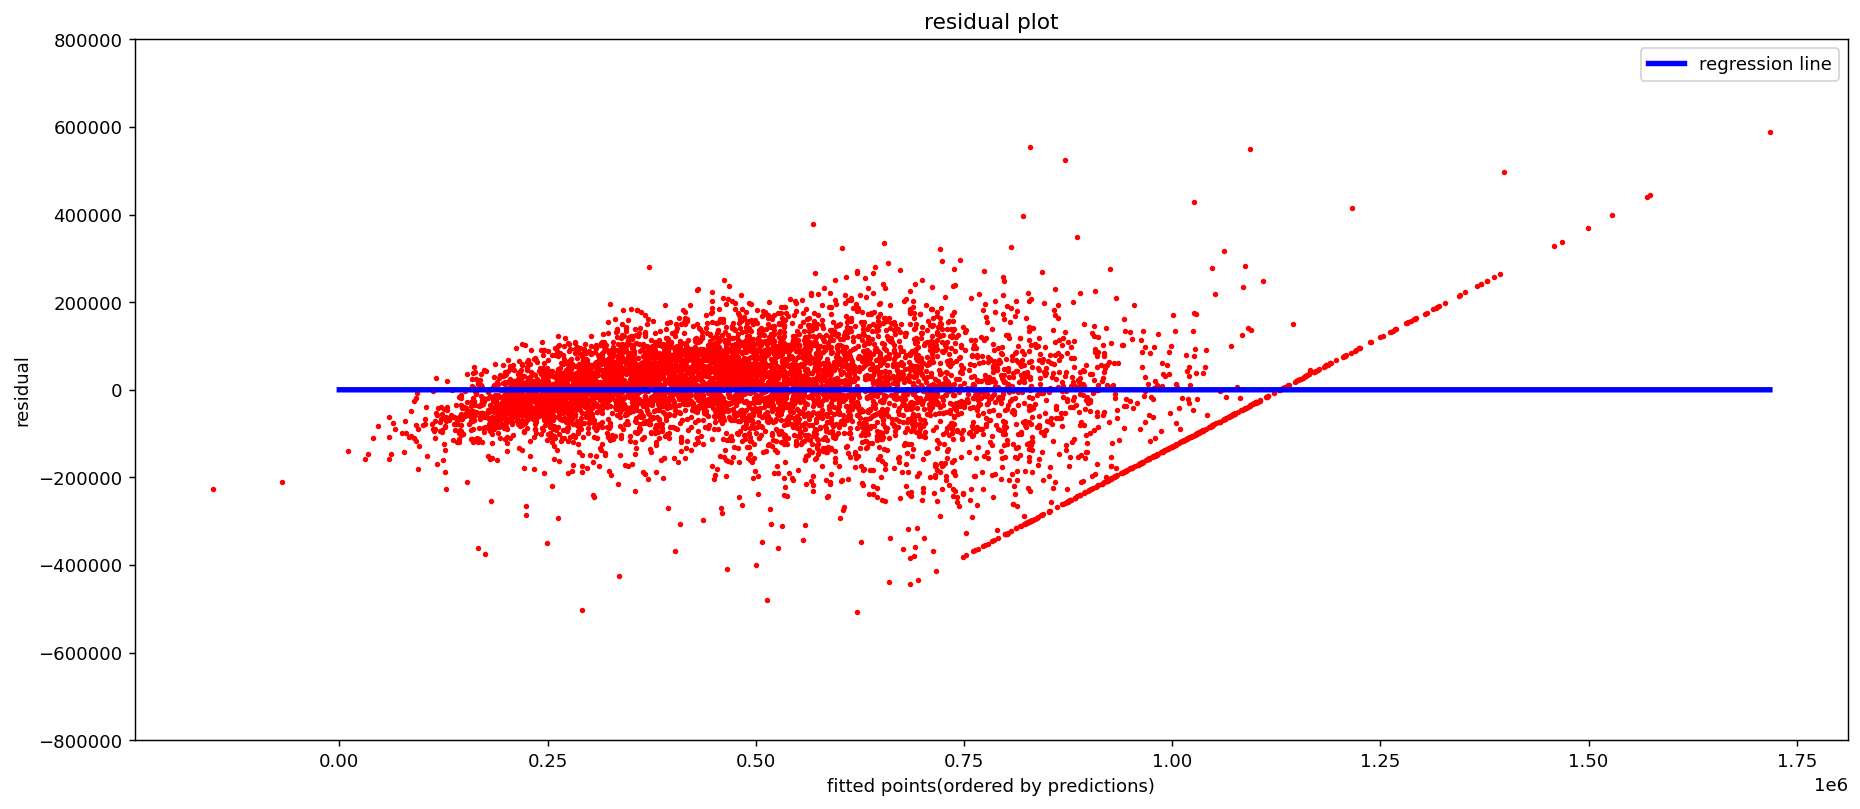

In [75]:
plt.figure(dpi = 130,figsize = (17,7))
plt.scatter(residual_table['prediction'],residual_table['residuals'],color = 'red',s = 4)
plt.plot(z,k,color = 'blue',linewidth = 3,label = 'regression line')
plt.ylim(-800000,800000)
plt.xlabel('fitted points(ordered by predictions)')
plt.ylabel('residual')
plt.title('residual plot')
plt.legend()
plt.show()


# distribution of error 

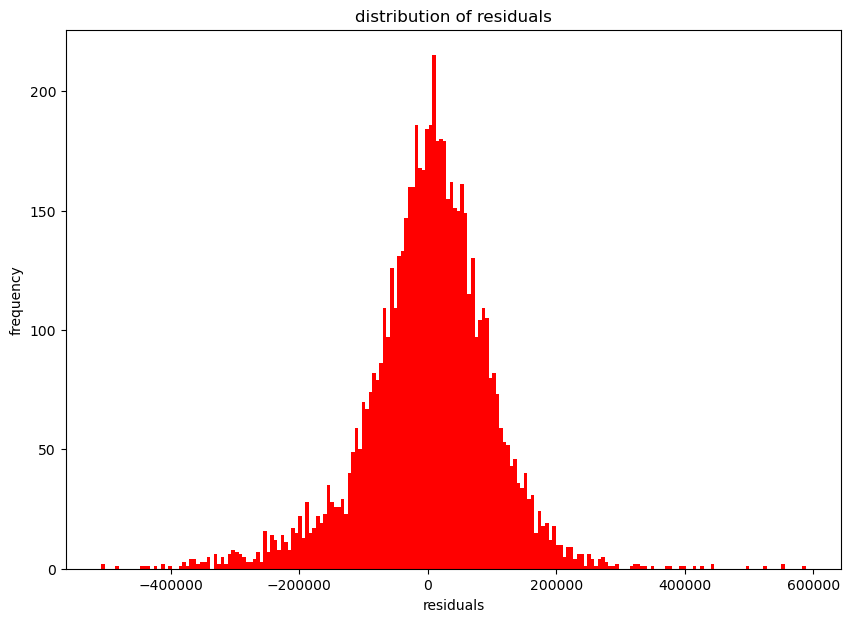

In [78]:
plt.figure(dpi = 100,figsize=(10,7))
plt.hist(residual_table['residuals'],color = 'red',bins = 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

# MODEL COEFFICIENT

In [85]:
coefficient_table = pd.DataFrame({'column':xtrain.columns,
                                  'coefficients':lr.coef_})
coefficient_table = coefficient_table.sort_values(by = 'coefficients')

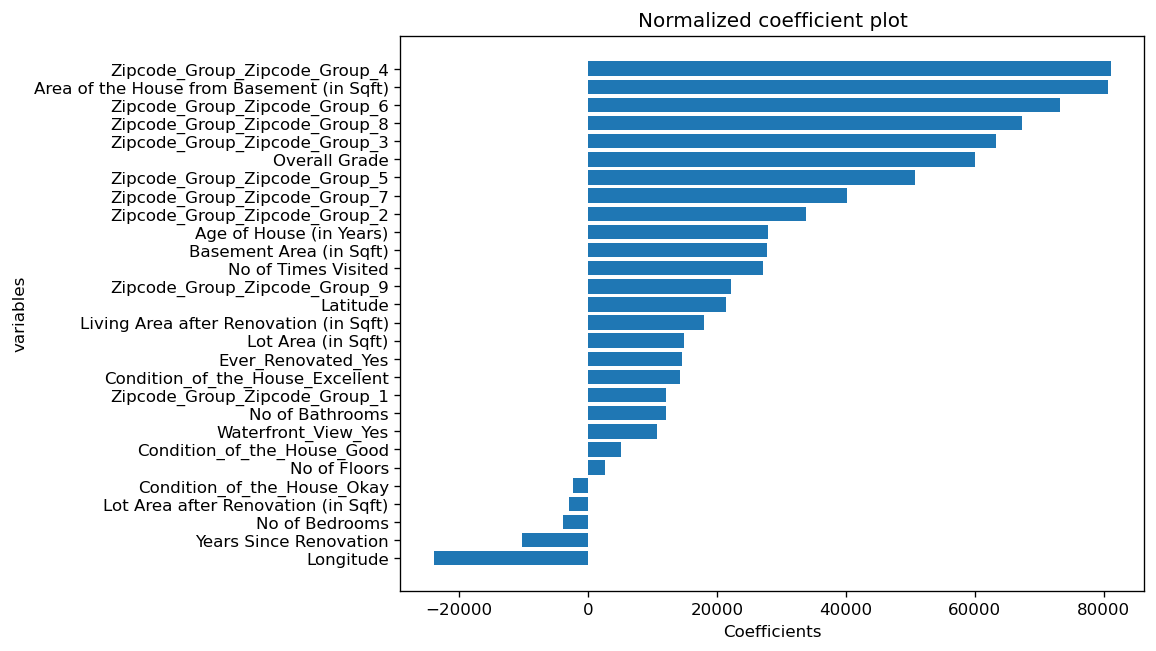

In [88]:
plt.figure(figsize = (8,6),dpi = 120)
x = coefficient_table['column']
y = coefficient_table['coefficients']
plt.barh(x,y)
plt.xlabel('Coefficients')
plt.ylabel('variables')
plt.title('Normalized coefficient plot')
plt.show()